In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\DELL\Downloads\car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.describe

<bound method NDFrame.describe of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [6]:
data.info

<bound method DataFrame.info of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [7]:
data.columns

Index(['Year', 'Price'], dtype='object')

# Missing values

In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

# Outlier detection

In [9]:
num_col=['Year','Price']

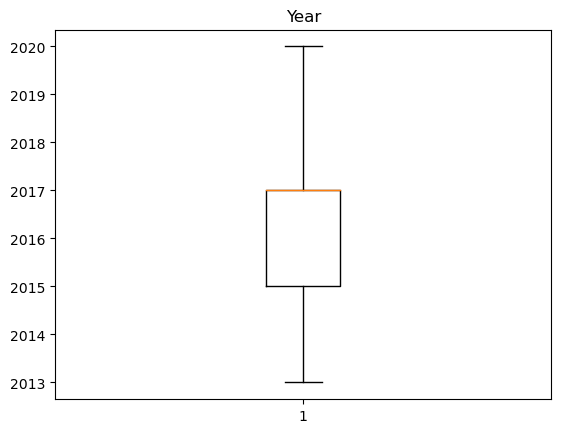

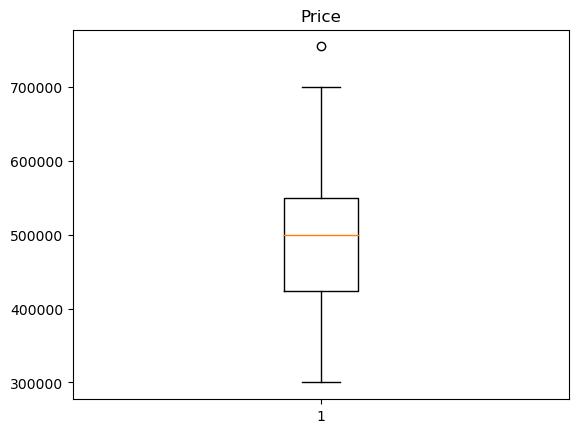

In [10]:
for i in num_col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [11]:
Q1 = np.percentile(data['Price'],25,method="midpoint")
Q2 = np.percentile(data['Price'],50,method="midpoint")
Q3 = np.percentile(data['Price'],75,method="midpoint")

In [12]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [13]:
IQR= Q3-Q1

In [14]:
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [15]:
print(upp_lim)
print(low_lim)

741250.0
231250.0


In [16]:
outliers=[]
for x in data['Price']:
    if(x>upp_lim)or(x<low_lim):
        outliers.append(x)

In [17]:
outliers

[755000]

# Visualisation

<Axes: >

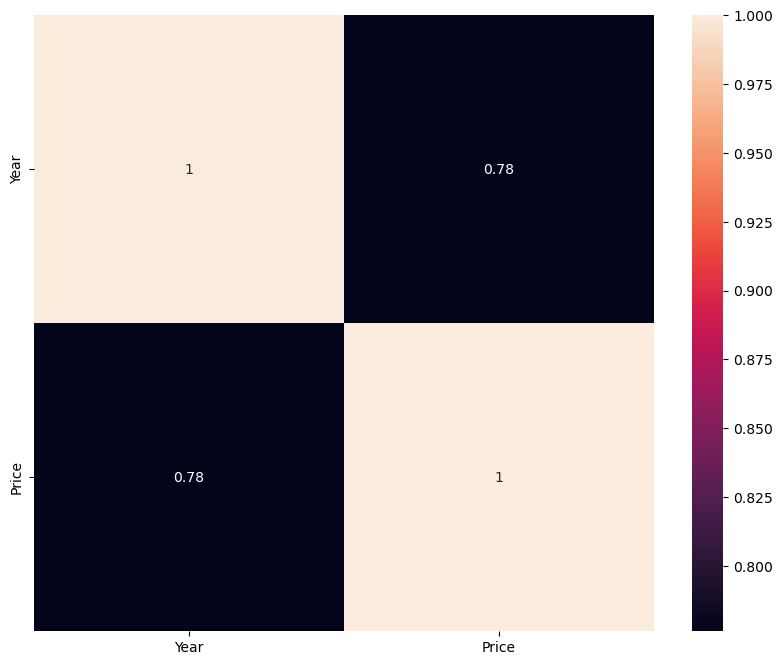

In [18]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,annot=True)

In [19]:
y = data['Price']  #target variable
x = data.drop(['Price'],axis=1)  #independant vari

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=120)

# Calculate the efficiancy of linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()
linear_model=lr.fit(x_train,y_train)
y_pred=linear_model.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
linear_mse=mean_squared_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)

In [25]:
print(linear_mse)
print(linear_r2)

2198306982.026254
0.7190944361799476


# Calculate the efficiency of lasso regression

In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso(alpha = 0.01)
lasso_model = lasso.fit(x_train,y_train)
y_pred1 = lasso_model.predict(x_test)

In [28]:
lasso_mse = mean_squared_error(y_test,y_pred1)
lasso_r2 = r2_score(y_test,y_pred1)

In [29]:
print(lasso_mse)
print(lasso_r2)

2198306893.9548273
0.7190944474339507


# To find which one is more efficient

In [30]:
if linear_mse < lasso_mse and linear_r2 > lasso_r2:
    selected_model = linear_model
    print("Selected model : Linear regression")
elif lasso_mse < linear_mse and lasso_r2 > linear_r2:
    selected_model = lasso_model
    print("Selected model : Lasso regression ")
else:
    print("Both models have similar performance.") 

Selected model : Lasso regression 


# Predicted price

In [31]:
predicted_price_2022 = selected_model.predict([[2022]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [32]:
predicted_price_2022

array([722228.05184886])